# Solutions for Homework 5 - Statistics and Pandas
**Due: Nov 9** 

***Total Points: 100***

For full points, your code
- must run without errors
- must by *pythonic*
- must be easily understandable, and well documented (either through inline comments or markdown).
- All plots must have clearly and meaningfully labeled axes, unless you are simply plotting arbitrary numbers. Add legends where needed.
- **Use separate markdown cells for any text answers.**
- **Show your work, i.e, print all relevant output.** Remember that having a variable in the last line of a jupyter cell block automatically prints it's value. You can use multiple code blocks for a single question.
- ***Please see the solutions (and related notes) for the previous HWs, as well as the comments on your submissions, before submitting this assignment. We will be less lenient for repeated mistakes.***

Remember to export your Jupyter notebook as a PDF file and upload both to Canvas.
```
File > Save and Export Notebook As... > PDF
```

Run every code block (and make sure the answer if fully visible) before submitting your notebook/PDF.

## Question 0

Import `matplotlib`, `numpy`, `pandas`, and `seaborn` here. You can import the required `scipy` and `statsmodels` modules when you need them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Before we get to the questions, let's look at the **`namedtuple`** data type.

A `namedtuple` is similar to a `tuple`, but specific items in the `namedtuple` can be accessed as object attributes.

See example below:

In [2]:
# Import namedtuple
from collections import namedtuple

# Create a namedtuple container for a "Line", which contains the slope and intercept
Line = namedtuple('Line', 'slope intercept')
Line

__main__.Line

In [3]:
# Create two instances of Line
line_1 = Line(0.7, 4.2)
line_2 = Line(1.3, 3.5)
print(line_1)
print(line_2)

Line(slope=0.7, intercept=4.2)
Line(slope=1.3, intercept=3.5)


In [4]:
# Access the slope and intercept as attributes of each instance
print(f"Line 1: y = {line_1.slope}x + {line_1.intercept}")
print(f"Line 2: y = {line_2.slope}x + {line_2.intercept}") 

Line 1: y = 0.7x + 4.2
Line 2: y = 1.3x + 3.5


## Question 1: Pandas

*25 points*

### Question 1.1

*10 points*

- Load the `"mpg"` dataset from `seaborn`.
- Print the model_year and name for all the vehicles that have an mpg of at least 42.

Hint: use `pandas.DataFrame.itertuples()` which returns an iterator of `namedtuple` objects.

In [5]:
# Load mpg dataset from seaborn
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Get subset DataFrame for vehicles with mpg >= 42
mpg_42 = mpg.copy()[mpg["mpg"] >=42]

# Print using itertuples()
print("Vehicles with an mpg of at least 42:")
for row in mpg_42.itertuples():
    print(f"\'{row.model_year} {row.name}")

Vehicles with an mpg of at least 42:
'78 volkswagen rabbit custom diesel
'80 mazda glc
'80 vw rabbit c (diesel)
'80 vw dasher (diesel)
'80 honda civic 1500 gl
'82 vw pickup


### Question 1.2

*5 points*

Print which vehicle had the lowest and highest mpg for each year. Also print the corresponding values of mpg. Include at least one blank line between model years.

Hint: use `pandas.DataFrame.groupby()`

In [8]:
# Group DataFrame by model_year
for model_year, mpg_year in mpg.groupby("model_year"):
    mpg_year.sort_values(by="mpg", inplace=True)
    print(f"Model Year: {model_year}")
    print(f"Lowest mpg: {mpg_year['mpg'].iloc[0]}. Vehicle: {mpg_year['name'].iloc[0]}")
    print(f"Highest mpg: {mpg_year['mpg'].iloc[-1]}. Vehicle: {mpg_year['name'].iloc[-1]}")
    print("")

Model Year: 70
Lowest mpg: 9.0. Vehicle: hi 1200d
Highest mpg: 27.0. Vehicle: datsun pl510

Model Year: 71
Lowest mpg: 12.0. Vehicle: dodge monaco (sw)
Highest mpg: 35.0. Vehicle: datsun 1200

Model Year: 72
Lowest mpg: 11.0. Vehicle: mercury marquis
Highest mpg: 28.0. Vehicle: datsun 510 (sw)

Model Year: 73
Lowest mpg: 11.0. Vehicle: oldsmobile omega
Highest mpg: 29.0. Vehicle: fiat 128

Model Year: 74
Lowest mpg: 13.0. Vehicle: buick century luxus (sw)
Highest mpg: 32.0. Vehicle: datsun 710

Model Year: 75
Lowest mpg: 13.0. Vehicle: ford mustang ii
Highest mpg: 33.0. Vehicle: honda civic cvcc

Model Year: 76
Lowest mpg: 13.0. Vehicle: dodge d100
Highest mpg: 33.0. Vehicle: honda civic

Model Year: 77
Lowest mpg: 15.0. Vehicle: mercury cougar brougham
Highest mpg: 36.0. Vehicle: renault 5 gtl

Model Year: 78
Lowest mpg: 16.2. Vehicle: peugeot 604sl
Highest mpg: 43.1. Vehicle: volkswagen rabbit custom diesel

Model Year: 79
Lowest mpg: 15.5. Vehicle: ford country squire (sw)
Highest m

### Question 1.3
*10 points*

On a single figure, plot the mean mpg by year for vehicles originating from Europe, Japan and USA (separately). *Use different colored lines for each origin.* Make sure you include a lengend.

Hint: use `pandas.DataFrame.groupby()` with `pandas.DataFrame.agg()` which aggregates data using one or more operations over the specified axis.

In [9]:
# Group DataFrame by origin and model_year
grouped_agg = mpg.groupby(["origin", "model_year"]).agg("mean")
grouped_agg

mpg  cylinders  displacement  horsepower  \
origin model_year                                                   
europe 70          25.200000   4.000000    107.800000   86.200000   
       71          28.750000   4.000000     95.000000   74.000000   
       72          22.000000   4.000000    111.000000   79.600000   
       73          24.000000   4.000000    105.000000   81.857143   
       74          27.000000   4.000000     93.166667   74.166667   
       75          24.500000   4.000000    109.500000   89.500000   
       76          24.250000   4.250000    116.125000   87.625000   
       77          29.250000   4.000000     98.500000   81.000000   
       78          24.950000   4.833333    126.166667   99.166667   
       79          30.450000   4.250000    126.000000   72.000000   
       80          37.288889   4.111111    104.222222   66.750000   
       81          31.575000   4.500000    122.750000   76.666667   
       82          40.000000   4.000000    101.000000   63.000000   
japan  70          25.500000   4.000000    105.000000   91.500000   
       71          29.500000   4.000000     88.250000   79.250000   
       72          24.200000   3.800000     99.400000   93.800000   
       73          20.000000   4.250000    107.750000   98.500000   
       74          29.333333   4.000000     89.500000   72.500000   
       75          27.500000   4.000000    110.250000   80.250000   
       76          28.000000   4.500000    107.250000   76.500000   
       77          27.416667   4.166667    100.500000   81.166667   
       78          29.687500   4.000000    107.250000   79.250000   
       79          32.950000   4.000000     85.500000   65.000000   
       80          35.400000   4.076923    104.615385   78.846154   
       81          32.958333   4.333333    107.500000   78.333333   
       82          34.888889   4.000000    103.777778   74.000000   
usa    70          15.272727   7.636364    336.909091  166.954545   
       71          18.100000   6.200000    257.000000  119.842105   
       72          16.277778   6.888889    281.250000  138.777778   
       73          15.034483   7.241379    314.103448  146.620690   
       74          18.333333   6.266667    236.066667  112.142857   
       75          17.550000   6.400000    253.400000  108.700000   
       76          19.431818   6.363636    243.954545  110.500000   
       77          20.722222   6.222222    242.333333  118.388889   
       78          21.772727   6.000000    217.545455  107.272727   
       79          23.478261   6.260870    231.260870  109.434783   
       80          25.914286   4.285714    151.571429   88.833333   
       81          27.530769   4.923077    164.846154   84.538462   
       82          29.450000   4.300000    142.950000   86.947368   

                        weight  acceleration  
origin model_year                             
europe 70          2309.200000     16.500000  
       71          2024.000000     16.750000  
       72          2573.200000     18.700000  
       73          2335.714286     16.428571  
       74          2139.333333     15.333333  
       75          2571.166667     15.083333  
       76          2611.000000     16.050000  
       77          2138.750000     15.000000  
       78          2691.666667     16.233333  
       79          2693.750000     18.400000  
       80          2348.000000     18.366667  
       81          2725.000000     17.500000  
       82          2055.000000     19.950000  
japan  70          2251.000000     14.750000  
       71          1936.000000     16.375000  
       72          2300.400000     15.400000  
       73          2397.250000     15.625000  
       74          2053.000000     17.666667  
       75          2303.250000     16.000000  
       76          2217.500000     16.575000  
       77          2295.833333     16.316667  
       78          2221.250000     16.200000  
       79          1997.500000     17.200000  
       80          2

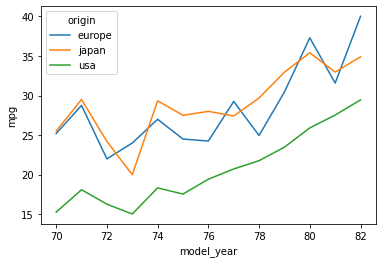

In [10]:
sns.lineplot(data=grouped_agg, x="model_year", y="mpg", hue="origin");

**Easier alternative:**

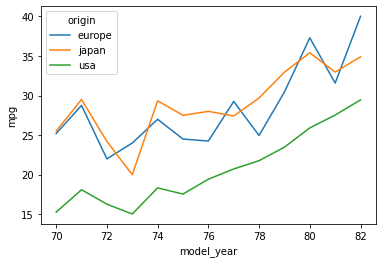

In [11]:
sns.lineplot(data=mpg, x="model_year", y="mpg", hue="origin",
              hue_order=["europe", "japan", "usa"], ci=None);

## Question 2: Hypothesis testing
*10 points*

For the data above, use `scipy.stats.mannwhitneyu` to test whether
- the `mpg` of vehicles with a more cylinders ($>4$) is *statistically different* from that of vehicles with a less cylinders ($\leq4$).
- the `acceleration` of vehicles with more cylinders ($>4$) is *statistically greater* than that of vehicles with less cylinders ($\leq4$).

Clearly state the null and alternative hypotheses, as well as the inference, for each case.

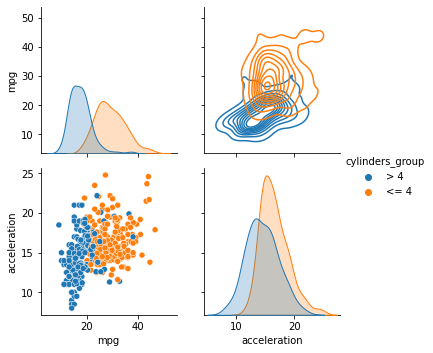

In [12]:
from scipy import stats

# Create a new column to help separate  the data
mpg["cylinders_group"] = "<= 4"
mpg.loc[(mpg["cylinders"] > 4 ), "cylinders_group"] = "> 4"

# Visualize the data
g2 = sns.PairGrid(mpg, vars=["mpg", "acceleration"], hue="cylinders_group")
g2.map_upper(sns.kdeplot);
g2.map_lower(sns.scatterplot)
g2.map_diag(sns.kdeplot, fill=True)
g2.add_legend();

**Null Hypothesis, $H_0$: Vehicles with more ($>4$) cylinders have the same distribution of mpg as vehicles with fewer ($\leq4$) cylinders.**

**Alternative Hypothesis, $H_A$: Vehicles with more ($>4$) cylinders have a different distribution of mpg than vehicles with fewer ($\leq4$) cylinders.**

In [13]:
stats.mannwhitneyu(mpg.loc[(mpg["cylinders_group"] == "> 4"), "mpg"],
                   mpg.loc[(mpg["cylinders_group"] == "<= 4"), "mpg"],
                   alternative="two-sided")

MannwhitneyuResult(statistic=1786.5, pvalue=1.94571389077842e-55)

**Answer:** With a `pvalue` of almost 0, we reject the null hypothesis in favor of the alternative hypothesis. The distributions are statistically different.

**Null Hypothesis, $H_0$: Vehicles with more ($>4$) cylinders have the same distribution of acceleration as vehicles with fewer ($\leq4$) cylinders.**

**Alternative Hypothesis, $H_A$: Vehicles with more ($>4$) cylinders have the a greater acceleration than vehicles with fewer ($\leq4$) cylinders.**

In [14]:
mpg.loc[(mpg["cylinders_group"] == "> 4"), "acceleration"]

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
365    17.1
366    16.6
386    16.4
387    17.0
389    14.7
Name: acceleration, Length: 190, dtype: float64

In [15]:
stats.mannwhitneyu(mpg.loc[(mpg["cylinders_group"] == "> 4"), "acceleration"],
                   mpg.loc[(mpg["cylinders_group"] == "<= 4"), "acceleration"],
                   alternative="greater")

MannwhitneyuResult(statistic=11513.0, pvalue=0.9999999999996937)

**Answer:** With a `pvalue` of ~1, we fail to reject the null hypothesis in favor of the alternative. We cannot statistically conclude that vehicles with more cylinders have a greater acceleration then vehicles with fewer cylinders.

## Question 3: Multiple linear regression
*15 points*

Using `statsmodels.formula.api.ols()`, determine how the acceleration of a vehicle in the dataset depends on its displacement and origin.

- Do you need to include interactions?
- Don't just fit a curve, plot the data and comment on the regression results. What do you learn from it?

Hint: Use `pandas.DataFrame.dropna()` to remove rows thant contain missing values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cylinders_group
0,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat 128,<= 4
1,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe,<= 4
2,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3,<= 4
3,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,<= 4
4,32.0,4,71.0,65.0,1836,21.0,74,japan,toyota corolla 1200,<= 4


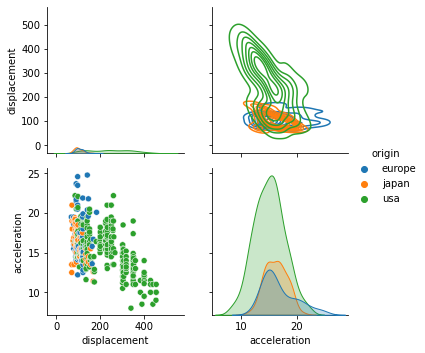

In [16]:
y = "acceleration"
x = "displacement"
c = "origin"

# Drop rows with missing values
mpg_cleaned = mpg.dropna(subset=[x, y, c], inplace=False)

# Sort (for plotting later)
mpg_cleaned.sort_values(by=x, ignore_index=True, inplace=True)

# Visualize the data
g3 = sns.PairGrid(mpg_cleaned, vars=[x, y], hue=c, hue_order=["europe", "japan", "usa"])
g3.map_upper(sns.kdeplot);
g3.map_lower(sns.scatterplot)
g3.map_diag(sns.kdeplot, fill=True)
g3.add_legend()

mpg_cleaned.head()

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     61.99
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.54e-33
Time:                        01:42:05   Log-Likelihood:                -891.03
No. Observations:                 398   AIC:                             1790.
Df Residuals:                     394   BIC:                             1806.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.7017      0

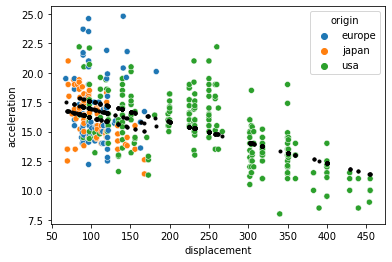

In [17]:
# Without interactions
from statsmodels.formula.api import ols

model_noint = ols(f"{y} ~ {x} + C({c})", data=mpg_cleaned).fit()
print(model_noint.summary())

# Plot
ax = sns.scatterplot(x=x, y=y, hue=c, data=mpg_cleaned)
ax.plot(mpg_cleaned[x], model_noint.fittedvalues, ".k");

**Answer:** Interactions need to be included as the $p$-value for the intercepts are not significant enough. The slope is dominated by the USA data, due to the larger number of data points (shown below). Hence, the slopes of the regression lines for Japan and Europe are inaccurate.

In [18]:
mpg.groupby("origin").count()[y]

origin
europe     70
japan      79
usa       249
Name: acceleration, dtype: int64

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     39.89
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.05e-33
Time:                        01:42:05   Log-Likelihood:                -886.12
No. Observations:                 398   AIC:                             1784.
Df Residuals:                     392   BIC:                             1808.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

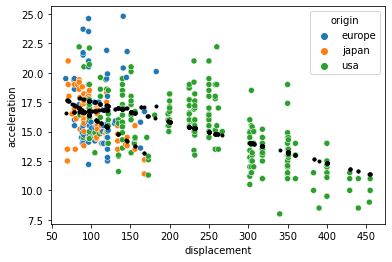

In [19]:
# With interactions
from statsmodels.formula.api import ols

model_int = ols(f"{y} ~ {x} + C({c}) + {x}*C({c})", data=mpg_cleaned).fit()
print(model_int.summary())

# Plot
ax = sns.scatterplot(x=x, y=y, hue=c, data=mpg_cleaned)
ax.plot(mpg_cleaned[x], model_int.fittedvalues, ".k");

**Answer:** From the $p$-values and the slope coefficients, there is no clear correlation between the acceleration and displacement for cars originating in Europe. On the other hand, there is a strong negative correlation for Japanese cars, i.e., acceleration (time) reduces with displacement. For American cars, there is a weak negative correlation ($p$-value slightly higher than 0.05).

As expected, displacement is not enough to predict a vehicle's acceleration. Other variables (e.g., weight) are also needed to build a complete model.

## Question 4: Higher order polynomial regression
*10 points*

- Load the data in `hopr.csv` using `pandas` 
- Perform polynomial regression to get the best fit.
- Print the parameters/coefficients for the final best fit polynomial.

*Take care to not overfit the data.* Use the lowest polynomical possible that sufficiently represents the underlying data.

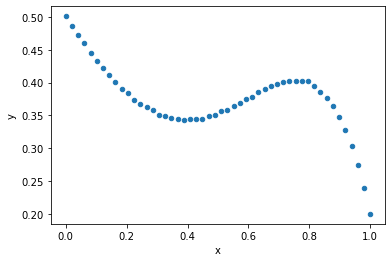

In [20]:
# Read csv file and plot
hopr = pd.read_csv("hopr.csv")
hopr.plot("x", "y", "scatter");

In [21]:
# Generate columns for x^i, for i = 2...9 
# We probably won't need to go to 9, but we will add higher orders one at a time and see what happens
for i in range(2, 10):
    hopr[f"x{i}"] = hopr["x"].pow(i)
hopr.head()

,x,y,x2,x3,x4,x5,x6,x7,x8,x9
0,0.000000,0.501051,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.020408,0.486098,0.000416,0.000008,1.734665e-07,3.540133e-09,7.224762e-11,1.474441e-12,3.009064e-14,6.140946e-16
2,0.040816,0.472236,0.001666,0.000068,2.775464e-06,1.132843e-07,4.623847e-09,1.887285e-10,7.703203e-12,3.144164e-13
3,0.061224,0.460380,0.003748,0.000229,1.405079e-05,8.602524e-07,5.266851e-08,3.224603e-09,1.974247e-10,1.208722e-11
4,0.081633,0.445572,0.006664,0.000544,4.440743e-05,3.625096e-06,2.959262e-07,2.415724e-08,1.972020e-09,1.609812e-10


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.68e-26
Time:                        01:42:06   Log-Likelihood:                 142.39
No. Observations:                  50   AIC:                            -276.8
Df Residuals:                      46   BIC:                            -269.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5313      0.008     69.090      0.0

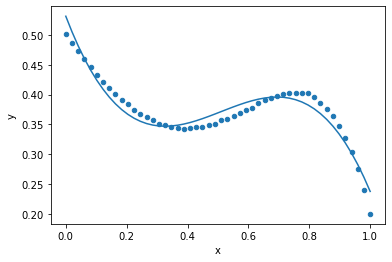

In [22]:
# 3rd order polynomial fit
model_3 = ols("y ~ x + x2 + x3", data=hopr).fit()
print(model_3.summary())

# Plot
ax = hopr.plot("x", "y", "scatter");
ax.plot(hopr["x"], model_3.fittedvalues);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.76e-66
Time:                        01:42:06   Log-Likelihood:                 246.48
No. Observations:                  50   AIC:                            -483.0
Df Residuals:                      45   BIC:                            -473.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4971      0.001    427.840      0.0

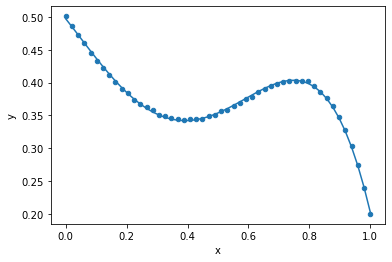

In [23]:
# 4th order polynomial fit
model_4 = ols("y ~ x + x2 + x3 + x4", data=hopr).fit()
print(model_4.summary())

# Plot
ax = hopr.plot("x", "y", "scatter");
ax.plot(hopr["x"], model_4.fittedvalues);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.154e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.31e-77
Time:                        01:42:06   Log-Likelihood:                 280.68
No. Observations:                  50   AIC:                            -549.4
Df Residuals:                      44   BIC:                            -537.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5008      0.001    739.751      0.0

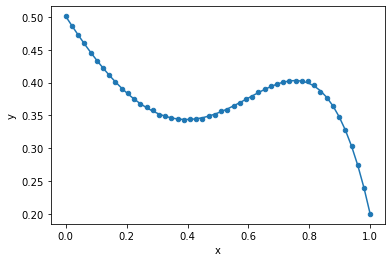

In [24]:
# 5th order polynomial fit
model_5 = ols("y ~ x + x2 + x3 + x4 + x5", data=hopr).fit()
print(model_5.summary())

# Plot
ax = hopr.plot("x", "y", "scatter");
ax.plot(hopr["x"], model_5.fittedvalues);

For the 5th order polynomial, the $p$-value for the coefficient of $x^4$ is much greater than 0.05. Further, 0 falls in the confidence interval for that coefficient. Hence, this coefficient should be removed.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.992e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.11e-79
Time:                        01:42:06   Log-Likelihood:                 280.42
No. Observations:                  50   AIC:                            -550.8
Df Residuals:                      45   BIC:                            -541.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5006      0.001    876.750      0.0

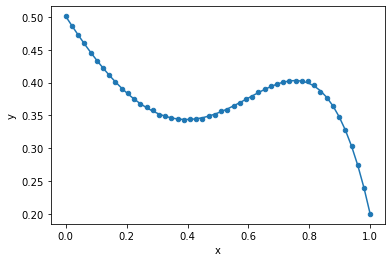

In [25]:
# 5th order polynomial fit without x4
model_5_mod = ols("y ~ x + x2 + x3 + x5", data=hopr).fit()
print(model_5_mod.summary())

# Plot
ax = hopr.plot("x", "y", "scatter");
ax.plot(hopr["x"], model_5.fittedvalues);

**Answer:** The best fit for this data is of the form
$$y = c_0 x + c_1 x_1 + c_2 x_2^2 + c_3 x_3^3 + c_5 x_5^5$$
The coefficients are given below:

In [26]:
model_5_mod.params

Intercept    0.500552
x           -0.708437
x2           0.436944
x3           1.056596
x5          -1.085585
dtype: float64

## Question 5: Regression and Curve fitting
*15 points*

In HW3, we looked at data from a compression test on a brittle material. Here, we are going to look at a test on a ductile strain-hardening material. The material deform's as per Hooke's law up to it's yield point, after which it follows a power-law hardening behavior.

The stress in the material is given by 

Elastic: $\sigma = E \epsilon_e \quad\quad\quad\quad\quad \sigma \leq \sigma_y$

Plastic: $\sigma = \sigma_y + \kappa \epsilon_p^n \quad\quad\quad \sigma > \sigma_y$

where:

$\sigma$ is the stress and \$\sigma_y$ is the yield stress;

$\epsilon_e$ and $\epsilon_p$ are the elastic and plastic strains, respectively;

$\kappa$ is the strength coefficient, and $n$ is the strain hardening exponent.

The compression test is peformed on a rectangular prismatic brittle specimen (cross-section area = 4x4 mm, length = 6 mm).

- Load the data from the provided `strain_hardening.csv` file using `pandas`. The data has already been cleaned for you. Displacement is in mm, force is in N.
- Perform a linear regression using `scipy.stats.linregress()` in the elastic regime of the data to calculate $E$ and $\sigma_y$.
- Perform a curve fit using `scipy.optimize.curve_fit()` in the plastic regime of the data to calculate $\kappa$ and $n$
- Print the values of all the variables calculated above using *scientific notation* with 2 decimal places. Use units of MPa for all parameters except $n$, which is dimensionless.
- Plot the raw stress (in MPa) vs strain curve, as well as the overall curve fit (elastic and plastic parts). The entire fit curve should be the same color. Mark the yield point. Make sure to include a legend.

**Note:** $\epsilon_p$ is the plastic strain, you must subtract the elastic strain ($\epsilon_e$) from the total strain to get the plastic strain.

Assume a 0.2% strain at the yield point; i.e., $\epsilon_y$ = 0.002. There is no plastic strain before yield and no elastic strain after yield.

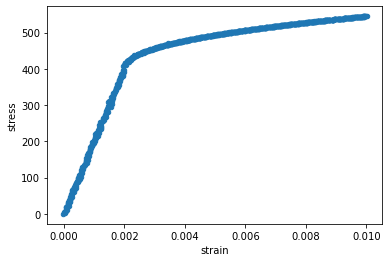

In [27]:
# Load data
data = pd.read_csv("strain_hardening.csv")

# Calculate strain and stress
data["strain"] = data["displacement"].div(6)
data["stress"] = data["force"].div(4*4)

# Plot
data.plot("strain", "stress", kind="scatter");

# Define yield strain
e_y = 0.002

In [28]:
# Elastic regime
# Separate data before yield strain
data_elastic = data.copy()[data["strain"] <= e_y]

# Perform fit and get E
fit_result = stats.linregress(data_elastic["strain"], data_elastic["stress"])
E = fit_result.slope

# Calculate sigma_y and the regression line
sigma_y = E*e_y
fit_elastic = fit_result.slope*data_elastic["strain"] + fit_result.intercept

# Print
print(f"E = {E:.2e} MPa")
print(f"sigma_y = {sigma_y:.2e} MPa")

E = 2.00e+05 MPa
sigma_y = 4.00e+02 MPa


In [29]:
from scipy import optimize

# Plastic regime
# Separate data after yield strain
data_plastic = data.copy()[data["strain"] > e_y]

# Define funtion for fit
def stress_func(strain, k, n):
    return sigma_y + k*(strain - e_y)**n

popt, pcov = optimize.curve_fit(stress_func,
                                data_plastic["strain"], data_plastic["stress"],
                                p0=(1000, 0.25))

# Calculate k, n and the fitted curve
k_opt, n_opt = popt
fit_plastic = stress_func(data_plastic["strain"], *popt)

print(f"K = {k_opt:.2e} MPa")
print(f"n = {n_opt:.2e}")

K = 1.27e+03 MPa
n = 4.48e-01


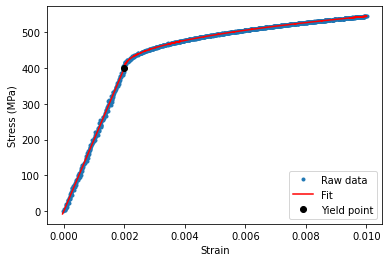

In [30]:
# Plot raw data and fits
plt.plot(data["strain"], data["stress"], ".", label="Raw data");
plt.plot(data_elastic["strain"], fit_elastic, "r", label="Fit")
plt.plot(data_plastic["strain"], fit_plastic, "r")
plt.plot(e_y, sigma_y, "ok", label="Yield point")
plt.xlabel("Strain")
plt.ylabel("Stress (MPa)")
plt.legend(loc="lower right");

## Question 6: Optimization
*10 points*

In HW3, we obtained the launch angle for the maximum range for a simple projectile motion problem.

Solve the same problem using `scipy.optimize.minimize_scalar()`. I.e., Maximize the range of the projectile within the bounds of $0^{\circ} \leq \theta \leq 90^{\circ}$. Print the answer in degrees.

Use `scipy.constants` for the value of $g$.

Since we already know that the velocity ($v$) is immaterial, assume $v=1$ for simplicity.

Ignore aerodynamic drag.

The range of the projectile is maximum at an angle of 45.0 degrees.


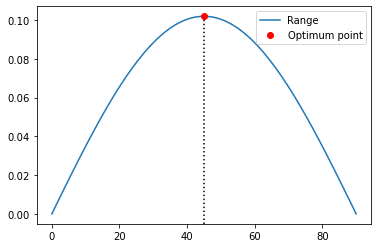

In [31]:
from scipy.constants import g

# Define function to minimize
# To maximize, we minimize the negative value of the function.
def projectile_range(theta):
    return -np.sin(2 * np.radians(theta)) / g

# Plot to visualize
angles = np.linspace(0, 90)
fig, ax = plt.subplots()
ax.plot(angles, -projectile_range(angles), label="Range")

optimum_angle = optimize.minimize_scalar(projectile_range, bounds=(0, 90), method="bounded")
max_range = -projectile_range(optimum_angle.x)
print(f"The range of the projectile is maximum at an angle of {optimum_angle.x} degrees.")
ax.plot(optimum_angle.x, max_range, "or", label="Optimum point");
ax.axvline(optimum_angle.x, ymax=max_range/ax.get_ylim()[1], color="k", linestyle=":")  # plot a vertical line
ax.legend();

## Question 7: Monte/y-Carlo-Hall Problem.
*15 points*

Before starting this question, familiarize yourself with the [Monty Hall problem](https://betterexplained.com/articles/understanding-the-monty-hall-problem/).

We are going to simulate this problem using the Monte-Carlo method.

Perform the following operations a large number of times. You can use a loop.
- Pick the locations for the car and the choices for the contestant's initial guess.
- Simulate the case where the contestant does not switch their guess after the goat is revealed.
- Simulate the case where the contestant swithes their guess after the reveal.

Calculate the probability of success (contestant wins the car) for each case, and print both probabilities in %, up to 2 decimal places.

With the Law of Large Numbers, your calculations should match up with the actual probablities if you used a large enough number of simulations. I suggest at least 1,000,000.

However, you should probably start with a small number like 10 while you get the code ready.

In [32]:
import random

# Set up number of simulations and initialize counters
num_sims = int(1e6)
# num_sims = 1
wins_noswitch, wins_switch = 0, 0

# Set up the doors that can be picked
doors = ["A", "B", "C"]

for i in range(num_sims):
    # Location of car and goats
    # While you could use a random choice here, it doesn't really matter.
    car_is_behind = "A"
    
    # Contestant initial guess
    contestant_guess = random.choice(doors)
    
    # Check if the car is behind the initially picked door
    if contestant_guess == car_is_behind:
        wins_noswitch += 1
    
    # Monty Hall reveals a door the contestant has not picked. That door must have not have the car. 
    reveal_options = [door for door in doors
                      if door != contestant_guess
                      and door != car_is_behind]
    goat_reveal = random.choice(reveal_options)
    
    # Contestant switches to the other available door.
    switched_guess = [door for door in doors 
                      if door != goat_reveal
                      and door != contestant_guess]
    
    # Check if the car is behind the switched door
    if switched_guess[0] == car_is_behind:
        wins_switch += 1

# Calculate and print probabilities
prob_noswitch = 100*wins_noswitch/num_sims
print(f"When staying with the initial guess, the probability of success is {prob_noswitch:.2f} %.")
prob_switch = 100*wins_switch/num_sims
print(f"When switching the guess, the probability of success is {prob_switch:.2f} %.\n")

When staying with the initial guess, the probability of success is 33.34 %.
When switching the guess, the probability of success is 66.66 %.



### Bonus: Extended script by Theodore Andrzejczyk

In [ ]:
# User input method, true and displayed randomness of door selection

import random # for randomly choosing a list index

# introduction
print("The Monty Hall problem\n"
      "Behind one door is a car, behind all others are goats - try to choose the door with the car.\n")
# print("After you make your first choice, all doors will be revealed except for 2 - behind one of which is the car.")
# print("You will then be able to switch doors if you like.\n")


# can modify list and number of trials (only 1 door is ever revealed)
number_of_doors = input('How many doors do you want? ')

# number of doors must be an integer of 3 or greater
while not number_of_doors.isdigit() or int(number_of_doors) < 3:
    number_of_doors = input('Please choose a whole number over 2. ')

number_of_doors = int(number_of_doors)  # formally make number_of_doors an int

options = ['car'] # a car must be behind one of the doors
options.extend(['goat'] * (number_of_doors-1))  # goats are behind the rest of the doors

# door numbers based on number of doors
door_numbers = list(range(1, number_of_doors+1))


# display door numbers and potential prizes
print(f"\nDoors: {door_numbers}")
print(f"Prizes: {options}")

# shuffle list and display door numbers
random.shuffle(options)
print("\nThe prizes are now being shuffled behind closed doors...")
print(f"Doors: {door_numbers}\n")

# users chooses 1 door
choice1_answer = input('Which door do you choose? ')

# the door chosen must be an integer between 1 and the number of doors
while not choice1_answer.isdigit() or int(choice1_answer) < 1 or int(choice1_answer) > number_of_doors:
    choice1_answer = input(f"Please select a whole number between 1 and {number_of_doors}. ")

choice1_answer = int(choice1_answer)  # formally make the answer an int
choice1_index = choice1_answer - 1  # list indices start at 0

car_index = options.index('car')  # find car index

# one closed door has to be the car while the other one has to be a goat
if choice1_index == car_index:
    door_numbers.pop(choice1_index)  # remove choice 1/'car' from the possible not revealed door options
    not_revealed_index = random.choice(door_numbers) - 1  # if choice 1 is the car, not revealed door is one of the doors remaining (index starts at 0)
else:
    not_revealed_index = car_index  # if choice1 isn't the car, the door not revealed has to be the car

# The revealed list of goats with only 2 doors still closed
reveal_options = options.copy()
reveal_options[choice1_index] = choice1_answer
reveal_options[not_revealed_index] = not_revealed_index + 1

# print the reveal of all goats except 2 closed doors
print(reveal_options)
print(f"\nAll doors have been opened to reveal goats, except for the door you chose "
      f"(door #{choice1_answer}) and door #{not_revealed_index+1}.\n")

# user chooses to switch or not
switch_answer = input(f'Would you like to switch to door #{not_revealed_index+1}? (y/n) ')

# answer to switch must be a 'y' or 'n'
while switch_answer != 'y' and switch_answer != 'n':
    switch_answer = input(f"Please enter 'y' for yes (switch doors) or 'n' for no (do not switch doors). ")
    
print(f"\nReveal: {options}\n")  # show all doors


# success calcs
# k = number of doors revealed (all but 2 are initially shown)
k = number_of_doors - 2

# % probability being successful when switching doors
switch_success = 100*(number_of_doors - 1) / (number_of_doors*(number_of_doors - k - 1))


# to switch or not to switch
if switch_answer == 'y':
    switch_index = not_revealed_index
    switch = options[switch_index]
    
    if switch == 'car':
        print(f"You have decided to switch to door #{not_revealed_index+1} and... WON A FREE CAR!!!!")
    else:
        print(f"You have decided to switch to door #{not_revealed_index+1} and... lost :(")
        
    # print probability of success given they chose to switch
    print(f"\nWith {number_of_doors} doors, your probability of winning "
          f"after your choice to switch doors was {switch_success:.2f} %")
elif switch_answer == 'n':
    switch_index = choice1_index
    switch = options[switch_index]
    
    if switch == 'car':
        print(f"You have decided to remain with door #{choice1_answer} and... WON A FREE CAR!!!!")
    else:
        print(f"You have decided to remain with door #{choice1_answer} and... lost :(")
    
    # print probability of success given they chose to not switch
    print(f"\nWith {number_of_doors} doors, your probability of winning"
          f" after your choice to NOT switch doors was {100-switch_success:.2f} %")